In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  # For evaluating model


In [8]:


# Load the CSV file using the full file path
file_path = r'C:\Users\Lenovo\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv'

# Load the data
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Basic info about the dataset (columns, data types, missing values, etc.)
df.info()

# Get summary statistics for numerical columns
df.describe()

# Check for any missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Replace 'Select' with NaN as it is equivalent to missing data
df.replace('Select', pd.NA, inplace=True)

# Check again for missing values
df.isnull().sum()

# Handling missing values
# Option 1: Drop rows with missing values (can be harsh if too many rows are dropped)
df.dropna(inplace=True)

# Option 2: Impute missing values (for categorical and numerical columns)
# Impute missing values for categorical columns with mode (most frequent value)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with median (robust to outliers)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
df.isnull().sum()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12528\661445137.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12528\661445137.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

# If there are duplicates, remove them
if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Confirm the removal of duplicates
df.duplicated().sum()


np.int64(0)

In [12]:
# Create dummy variables for categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check the resulting dataframe after creating dummy variables
df.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Prospect ID_01c951dd-cebb-4d54-8d06-4b9f3919d0c7,Prospect ID_05d1b0d6-b253-49ff-897f-6112bdfbbac3,Prospect ID_06e26dfb-64f7-4fe0-808f-816412e8cc3a,...,Asymmetrique Profile Index_02.Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6,660673,1,2.0,1640,2.0,14.0,20.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
22,660471,1,1.0,1013,1.0,15.0,20.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
27,660424,1,6.0,1315,6.0,15.0,19.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
37,660267,1,5.0,563,5.0,13.0,20.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
39,660236,1,4.0,25,4.0,14.0,19.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [14]:
# Check the data types of each column to ensure they are appropriate
df.dtypes

# Ensure no missing or duplicate values remain
df.isnull().sum()
df.duplicated().sum()

# Final dataset ready for analysis
df.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Prospect ID_01c951dd-cebb-4d54-8d06-4b9f3919d0c7,Prospect ID_05d1b0d6-b253-49ff-897f-6112bdfbbac3,Prospect ID_06e26dfb-64f7-4fe0-808f-816412e8cc3a,...,Asymmetrique Profile Index_02.Medium,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6,660673,1,2.0,1640,2.0,14.0,20.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
22,660471,1,1.0,1013,1.0,15.0,20.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
27,660424,1,6.0,1315,6.0,15.0,19.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
37,660267,1,5.0,563,5.0,13.0,20.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False
39,660236,1,4.0,25,4.0,14.0,19.0,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Loading the Data: You load the CSV file containing leads information using pandas.

Understanding the Data: You inspect the dataset to understand the columns, data types, and any initial missing values.

Handling Missing Values: Missing values are treated by either dropping rows or imputing based on the column type (mode for categorical, median for numerical).

Removing Duplicates: You check for any duplicate rows in the dataset and remove them.

Creating Dummy Variables: Categorical columns are converted to dummy variables, which are essential for modeling.

Ensuring Data Quality: You perform final checks on data types, missing values, and duplicates to ensure the data is ready for modeling.

In [15]:
# Define the features (X) and target variable (y)
X = df.drop('Converted', axis=1)  # Drop the target column from the feature set
y = df['Converted']  # Define the target column

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape)


(208, 390) (90, 390)


In [17]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


Best Accuracy: 0.92
Confusion Matrix:
[[20  4]
 [ 3 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.94      0.95      0.95        66

    accuracy                           0.92        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.92      0.92      0.92        90

AUC-ROC Score: 0.95


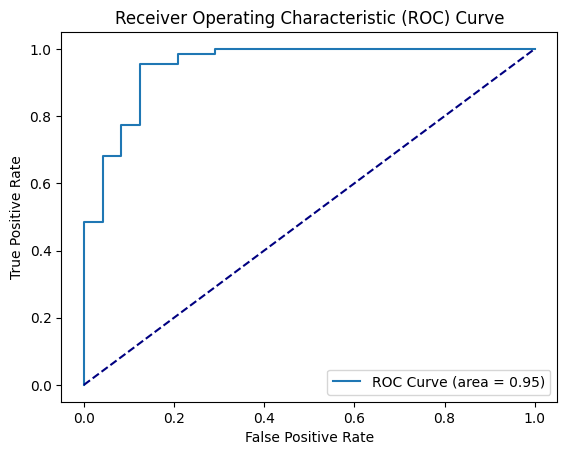

In [19]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and grid search
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  # For evaluating model

# Load your dataset (Assuming the data has been preprocessed)
# df = pd.read_csv('your_preprocessed_data.csv')

# Define your features (X) and target variable (y)
X = df.drop('Converted', axis=1)  # Drop the target column
y = df['Converted']  # Define the target column

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Set up the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Different solvers for optimization
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [20]:
# Set up the hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test data using the best model
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {accuracy_best:.2f}")


Best parameters found:  {'C': 1, 'solver': 'lbfgs'}
Best Accuracy: 0.92


In [23]:
# Import necessary metrics at the beginning of your code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the best model's performance

# Accuracy 
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred_best)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred_best)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred_best)
print(f"F1-Score: {f1:.2f}")

# AUC-ROC score
roc_auc = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc:.2f}")


Accuracy: 0.92
Precision: 0.94
Recall: 0.95
F1-Score: 0.95
AUC-ROC Score: 0.95


In [25]:
# Save the feature names before scaling
feature_names = X.columns  # This is the original column names of your data

# Get the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': grid_search.best_estimator_.coef_[0]
})

# Sort the features by absolute coefficient value to see importance
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Display the top features
print(coefficients.head(10))



                                      Feature  Coefficient  Abs_Coefficient
360  Tags_Will revert after reading the email     0.764354         0.764354
354          Tags_Interested in other courses    -0.685837         0.685837
4                 Asymmetrique Activity Score     0.641541         0.641541
2                 Total Time Spent on Website     0.638363         0.638363
368                        Lead Quality_Worst    -0.491834         0.491834
367                     Lead Quality_Not Sure    -0.464612         0.464612
357                              Tags_Ringing    -0.451337         0.451337
331  Specialization_Human Resource Management    -0.431519         0.431519
350                   Tags_Closed by Horizzon     0.420889         0.420889
364                         Tags_switched off    -0.381169         0.381169
